$Loan$ $Eligibility$ $Prediction$

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import logging
from logging.handlers import TimedRotatingFileHandler
warnings.filterwarnings('ignore')

In [2]:
def setup_logger(name: str, log_filename: str | Path, level = logging.INFO) -> logging.Logger:
    ''' Setup a dedicated timedrotatingfilehandler logging system that logs information to both file and console

    Args: 
        name : logger name (e.g. EDA, preprocessing, feature_engineering)
        log_filename: Log output file
        level: Logging level (e.g. INFO, WARNING, ERROR, DEBUG)

    Examples:
        log = setup_logger(name="EDA",log_filename="logs/EDA_pipeline.log", level=logging.INFO)
        log.info("Dedicated logging system setup successful")
    '''
    log = logging.getLogger(name)
    # prevent adding handlers multiple times if handlers already exist
    if log.handlers:
        return log
    
    formatter = logging.Formatter(
        "%(asctime)s - %(levelname)s : %(message)s",
        datefmt='%Y-%m-%d %H:%M:%S'
        )
    # Time rotating file handler
    file_handler = TimedRotatingFileHandler(
        filename=log_filename,
        when='midnight',
        interval=1,
        backupCount=7
    )
    file_handler.suffix = "_%Y%m%d"
    file_handler.setFormatter(formatter)
    
    console_handler = logging.StreamHandler()
    console_handler.setFormatter(formatter)

    log.propagate = False # don't propagate to root logger
    log.setLevel(level)

    log.addHandler(file_handler)
    log.addHandler(console_handler)
    
    return log

In [3]:
log = setup_logger(name='notebook_eda', log_filename='../logs/notebook_eda.log')

`Basic Descriptive Summary`

In [4]:
try:
    df = pd.read_csv('../data/raw/LEP.csv')
except FileNotFoundError:
    log.error('File not found! Check filepath and try again')
    raise
except Exception as e:
    log.error(f'Error parsing CSV file: {e}',exc_info=True)

In [5]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [7]:
log.info(f'Number of observations: {df.shape[0]}')

2025-11-08 10:31:58 - INFO : Number of observations: 614


In [8]:
log.info(f'Number of features: {df.shape[1]}')

2025-11-08 10:31:58 - INFO : Number of features: 13


In [9]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,614.0,307.500000,177.390811,1.0,154.25,307.5,460.75,614.0
Dependents,614.0,0.856678,1.216651,0.0,0.00,0.0,2.00,4.0
Applicant_Income,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
Coapplicant_Income,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
Loan_Amount,614.0,142.022801,87.083089,9.0,98.00,125.0,164.75,700.0
Loan_Amount_Term,614.0,338.892508,69.716355,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.850163,0.357203,0.0,1.00,1.0,1.00,1.0


In [10]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Gender,614,2,Male,499
Married,614,2,Yes,399
Education,614,2,Graduate,480
Self_Employed,614,2,No,523
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


`Numerical Columns`

In [11]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
log.info(f'NUMERICAL COLUMNS')
log.info('='*30)
log.info(numeric_columns)
log.info('='*30)

2025-11-08 10:31:58 - INFO : NUMERICAL COLUMNS
2025-11-08 10:31:58 - INFO : ==============================
2025-11-08 10:31:58 - INFO : ['Customer_ID', 'Dependents', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History']
2025-11-08 10:31:58 - INFO : ==============================


In [12]:
log.info('='*50)
for i, col in enumerate(numeric_columns,1):
    log.info(f'{i}. {col:<20} | Min: {df[col].min():<7} | Max: {df[col].max()}')
log.info('='*50)

2025-11-08 10:31:58 - INFO : ==================================================
2025-11-08 10:31:58 - INFO : 1. Customer_ID          | Min: 1       | Max: 614
2025-11-08 10:31:58 - INFO : 2. Dependents           | Min: 0       | Max: 4
2025-11-08 10:31:58 - INFO : 3. Applicant_Income     | Min: 150     | Max: 81000
2025-11-08 10:31:58 - INFO : 4. Coapplicant_Income   | Min: 0.0     | Max: 41667.0
2025-11-08 10:31:58 - INFO : 5. Loan_Amount          | Min: 9       | Max: 700
2025-11-08 10:31:58 - INFO : 6. Loan_Amount_Term     | Min: 12      | Max: 480
2025-11-08 10:31:58 - INFO : 7. Credit_History       | Min: 0       | Max: 1
2025-11-08 10:31:58 - INFO : ==================================================


`Categorical Columns`

In [13]:
log.info('CATEGORICAL COLUMNS')
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
log.info('='*30)
log.info(categorical_cols)
log.info('='*30)

2025-11-08 10:31:58 - INFO : CATEGORICAL COLUMNS
2025-11-08 10:31:58 - INFO : ==============================
2025-11-08 10:31:58 - INFO : ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
2025-11-08 10:31:58 - INFO : ==============================


In [14]:
log.info('='*30)
for i, col in enumerate(categorical_cols,1):
    uniques = df[col].unique()
    log.info(f'{i}. {col:<15} | Unique : {df[col].nunique()} | Examples: {uniques[:6]}')
log.info('='*30)

2025-11-08 10:31:58 - INFO : ==============================
2025-11-08 10:31:58 - INFO : 1. Gender          | Unique : 2 | Examples: ['Female' 'Male']
2025-11-08 10:31:58 - INFO : 2. Married         | Unique : 2 | Examples: ['No' 'Yes']
2025-11-08 10:31:58 - INFO : 3. Education       | Unique : 2 | Examples: ['Graduate' 'Not Graduate']
2025-11-08 10:31:58 - INFO : 4. Self_Employed   | Unique : 2 | Examples: ['No' 'Yes']
2025-11-08 10:31:58 - INFO : 5. Property_Area   | Unique : 3 | Examples: ['Urban' 'Semiurban' 'Rural']
2025-11-08 10:31:58 - INFO : 6. Loan_Status     | Unique : 2 | Examples: ['N' 'Y']
2025-11-08 10:31:58 - INFO : ==============================


`Missing Values`

In [15]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'missing_values' : missing,
    'missing_pct' : missing_pct.round(2)
})

log.info('MISSING VALUES')
log.info('='*30)
log.info(missing_df)
log.info('='*30)

2025-11-08 10:31:58 - INFO : MISSING VALUES
2025-11-08 10:31:58 - INFO : ==============================
2025-11-08 10:31:58 - INFO : Empty DataFrame
Columns: [missing_values, missing_pct]
Index: []
2025-11-08 10:31:58 - INFO : ==============================


`Duplicate Values`

In [16]:
duplicates = df[df.duplicated()]
log.info(f'DUPLICATED VALUES')
log.info('='*30)
log.info(f'Number of duplicated values : {len(duplicates)}')
log.info('='*30)

2025-11-08 10:31:58 - INFO : DUPLICATED VALUES
2025-11-08 10:31:58 - INFO : ==============================
2025-11-08 10:31:58 - INFO : Number of duplicated values : 0
2025-11-08 10:31:58 - INFO : ==============================


`Handling Outlier Values`

In [17]:
log.info('OUTLIER SUMMARY')
log.info('='*35)
for i,col in enumerate(numeric_columns[1:],1): # ignore customerID column - just an identifier
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    log.info(f'{i}. {col:<20} | Number of outliers : {len(outliers):<2} | Range ({lower_bound} - {upper_bound})')
log.info('='*35)

2025-11-08 10:31:58 - INFO : OUTLIER SUMMARY
2025-11-08 10:31:58 - INFO : ===================================
2025-11-08 10:31:58 - INFO : 1. Dependents           | Number of outliers : 0  | Range (-3.0 - 5.0)
2025-11-08 10:31:58 - INFO : 2. Applicant_Income     | Number of outliers : 50 | Range (-1498.75 - 10171.25)
2025-11-08 10:31:58 - INFO : 3. Coapplicant_Income   | Number of outliers : 18 | Range (-3445.875 - 5743.125)
2025-11-08 10:31:58 - INFO : 4. Loan_Amount          | Number of outliers : 41 | Range (-2.125 - 264.875)
2025-11-08 10:31:58 - INFO : 5. Loan_Amount_Term     | Number of outliers : 97 | Range (360.0 - 360.0)
2025-11-08 10:31:58 - INFO : 6. Credit_History       | Number of outliers : 92 | Range (1.0 - 1.0)
2025-11-08 10:31:58 - INFO : ===================================


$Visualizations$

`Univariate Analysis`

2025-11-08 10:31:58 - INFO : ==================================================
2025-11-08 10:31:58 - INFO : NUMERIC COLUMNS - VISUALIZATIONS
2025-11-08 10:31:58 - INFO : ==================================================


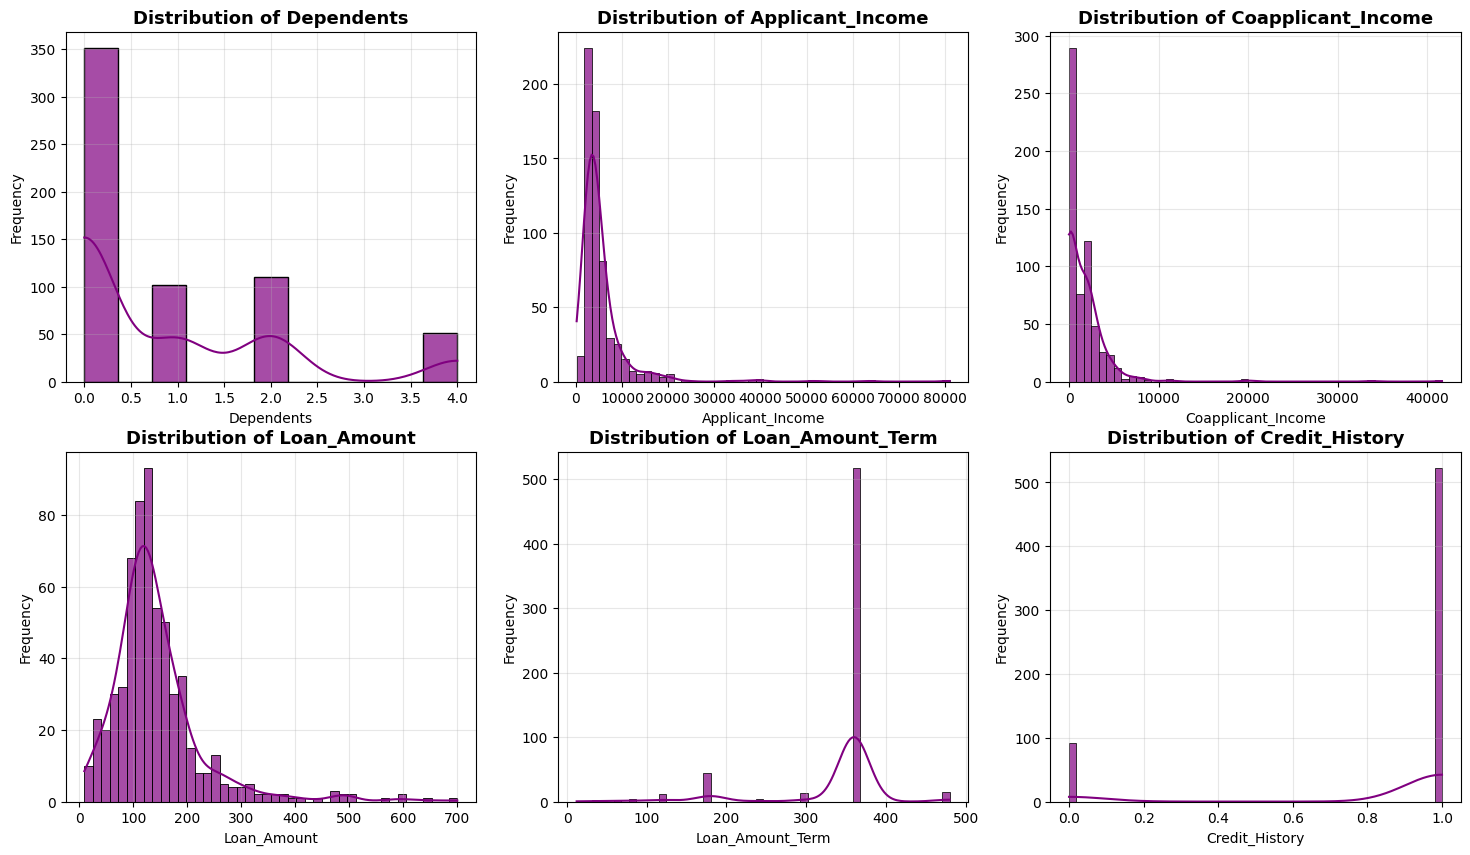

2025-11-08 10:32:00 - INFO : Distribution of numeric columns plotted!


In [18]:
log.info('='*50)
log.info('NUMERIC COLUMNS - VISUALIZATIONS')
log.info('='*50)
plt.figure(figsize=(18,10))
for i,col in enumerate(numeric_columns[1:],1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, color='purple', alpha=0.7,kde=True)
    plt.title(f'Distribution of {col}', fontsize=13, fontweight='bold')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.show()
log.info(f'Distribution of numeric columns plotted!')
plt.close()

2025-11-08 10:32:00 - INFO : ==================================================
2025-11-08 10:32:00 - INFO : BOXPLOTS - OUTLIER DETECTION
2025-11-08 10:32:00 - INFO : ==================================================


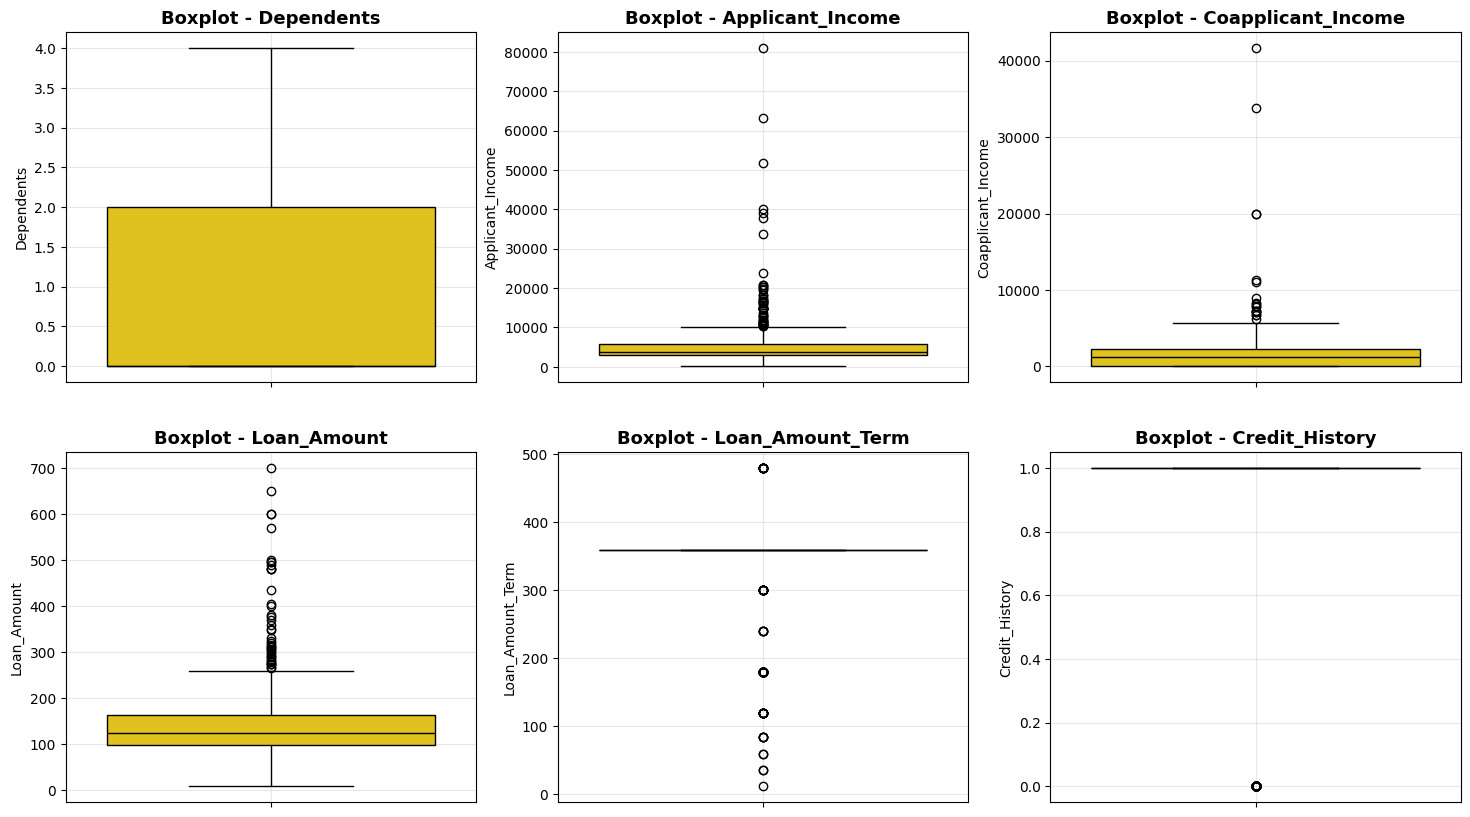

2025-11-08 10:32:01 - INFO : Boxplots of numeric columns plotted!


In [19]:
log.info('='*50)
log.info('BOXPLOTS - OUTLIER DETECTION')
log.info('='*50)

plt.figure(figsize=(18,10))
for i,col in enumerate(numeric_columns[1:],1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='gold', linecolor='black')
    plt.title(f'Boxplot - {col}', fontsize=13, fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.show()
log.info(f'Boxplots of numeric columns plotted!')
plt.close()

2025-11-08 10:32:01 - INFO : ==================================================
2025-11-08 10:32:01 - INFO : CATEGORICAL COLUMNS
2025-11-08 10:32:01 - INFO : ==================================================


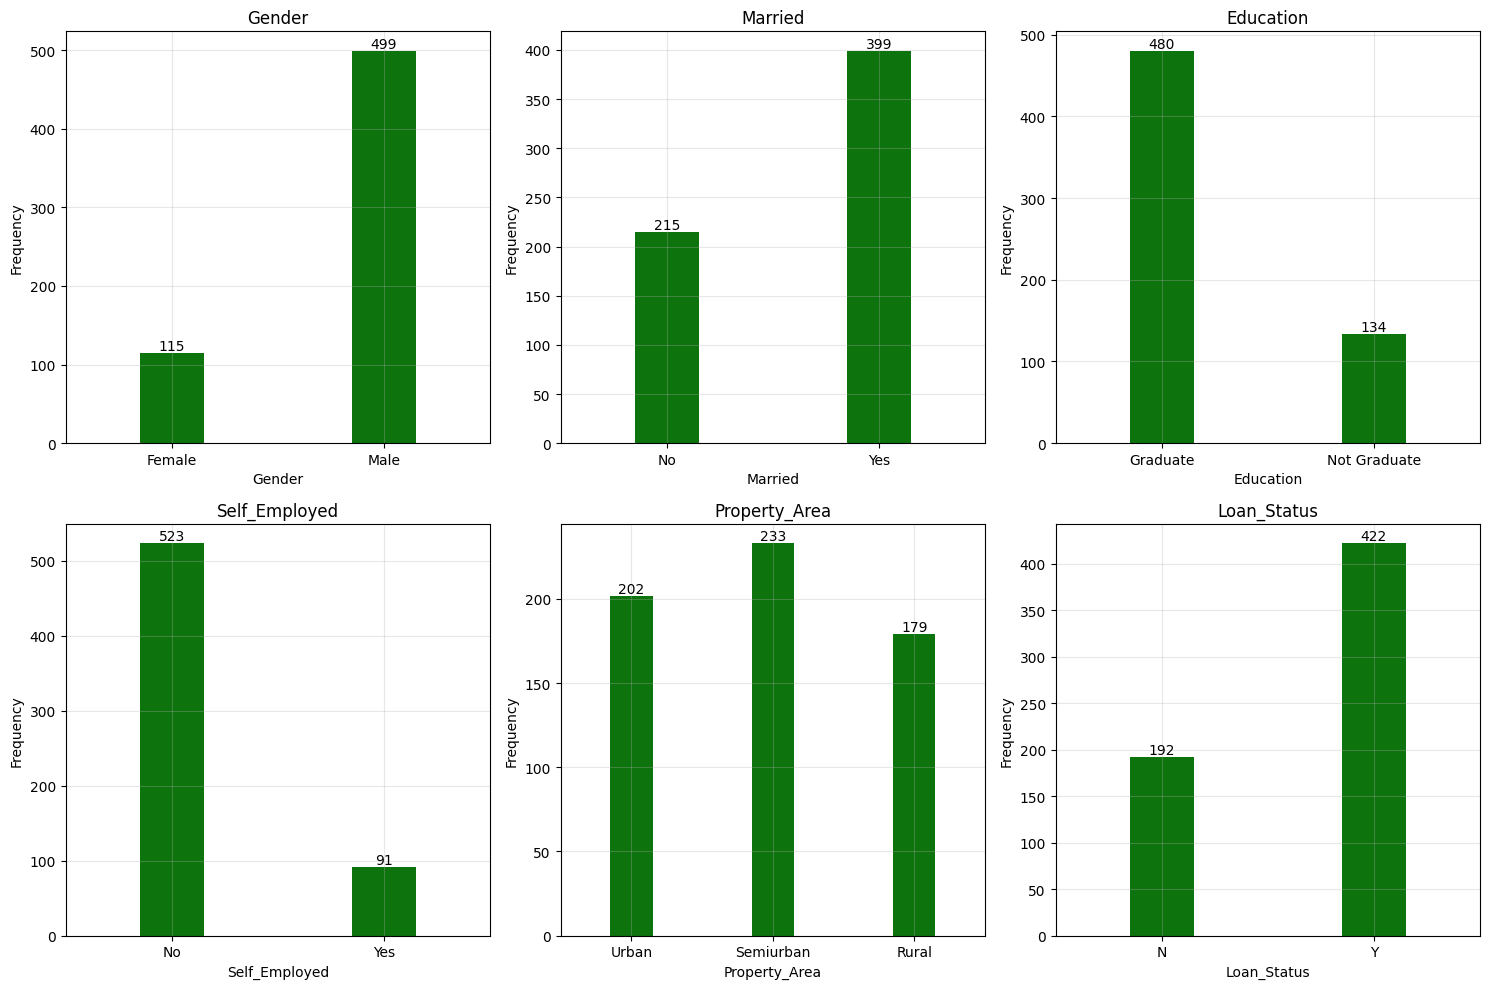

2025-11-08 10:32:02 - INFO : Categorical columns plotting successful


In [20]:
log.info('='*50)
log.info('CATEGORICAL COLUMNS')
log.info('='*50)

plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols,1):
    plt.subplot(2, 3, i)
    ax = sns.countplot(data=df, x=col, gap=0.4, width=0.5, saturation=0.8, color='green')
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')
    ax.set_title(f'{col}')
    ax.set_ylabel('Frequency')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
log.info(f'Categorical columns plotting successful')
plt.close()

`Multivariate Analysis`

2025-11-08 10:32:02 - INFO : ==================================================
2025-11-08 10:32:02 - INFO : CORRELATION HEATMAP
2025-11-08 10:32:02 - INFO : ==================================================


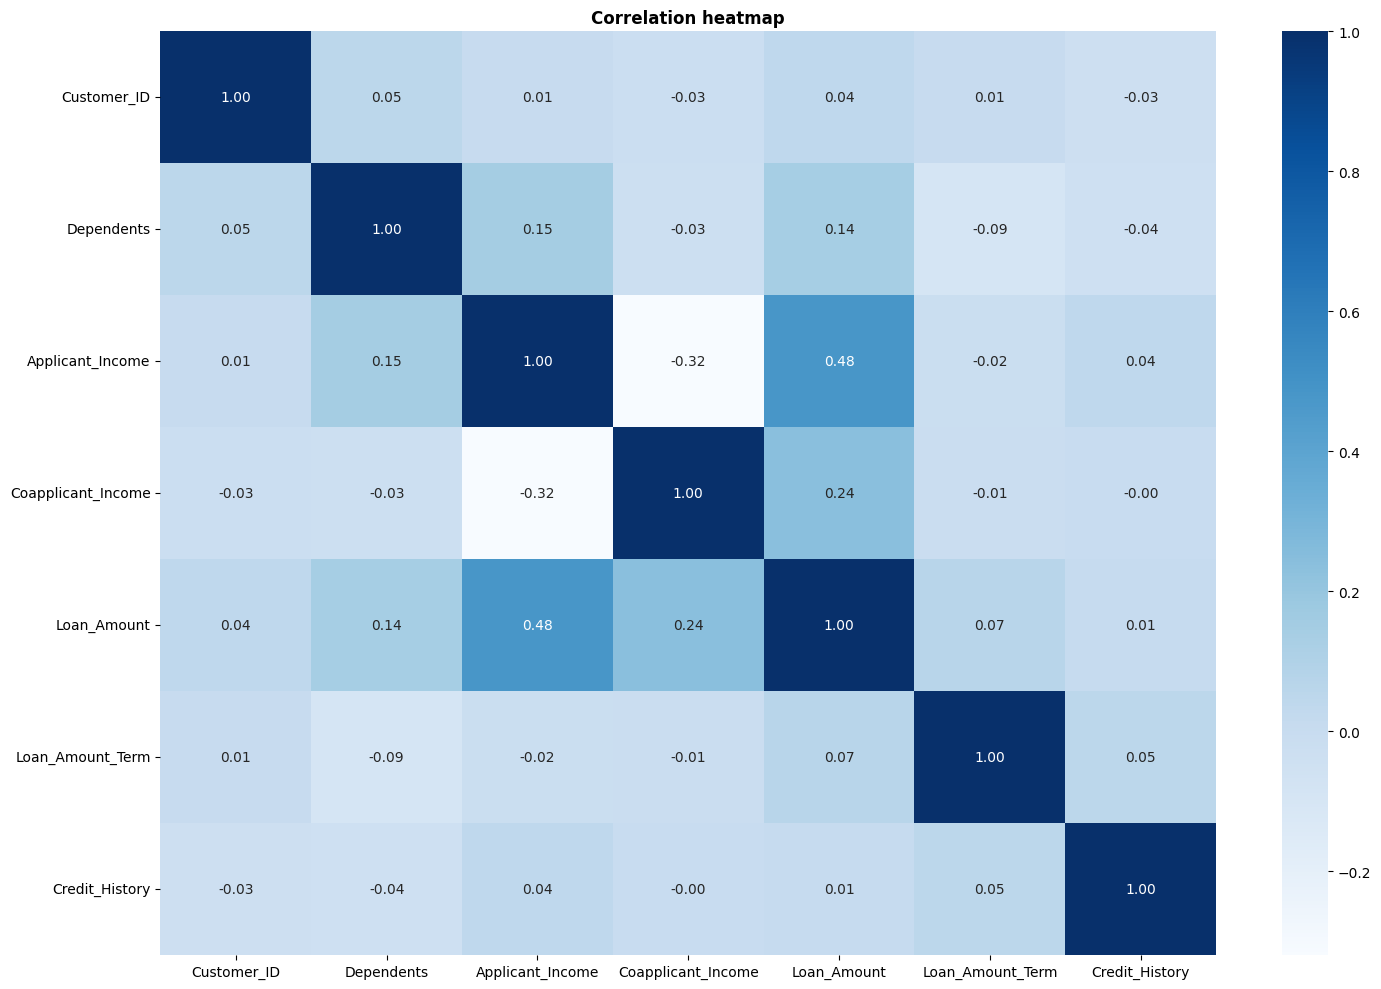

2025-11-08 10:32:02 - INFO : Heatmap successfully plotted


In [21]:
log.info('='*50)
log.info('CORRELATION HEATMAP')
log.info('='*50)

corr = df.corr(numeric_only=True, method='spearman')

plt.figure(figsize=(15,10))
sns.heatmap(data=corr,annot=True,fmt='.2f',cmap='Blues')
plt.title(f'Correlation heatmap', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()
log.info(f'Heatmap successfully plotted')
plt.close()

In [42]:
log.info('='*30)
log.info('TARGET VARIABLE')
log.info('='*30)

group_values = df['Loan_Status'].value_counts().to_dict()
for group, value in group_values.items():
    log.info(f'{group} : {value}')

2025-11-08 11:06:11 - INFO : ==============================
2025-11-08 11:06:11 - INFO : TARGET VARIABLE
2025-11-08 11:06:11 - INFO : ==============================
2025-11-08 11:06:11 - INFO : Y : 422
2025-11-08 11:06:11 - INFO : N : 192


`Confidence Interval`

In [44]:
from scipy import stats
def calculate_ci(data, confidence=0.95):
    """
    Calculate confidence interval for a numerical feature
    
    Args:
        data: array-like numerical data
        confidence: confidence level (default 0.95 for 95% CI)
    
    Returns:
        dict with mean, lower_bound, upper_bound, margin_of_error
    """
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)  # standard error
    margin = se * stats.t.ppf((1 + confidence) / 2, n - 1)
    
    return {
        'mean': mean,
        'lower_bound': mean - margin,
        'upper_bound': mean + margin,
        'margin_of_error': margin,
        'sample_size': n
    }

log.info('='*60)
log.info('CONFIDENCE INTERVALS FOR NUMERICAL FEATURES')
log.info('='*60)

# Example: Calculate 95% CI for all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Customer_ID']  # exclude ID

for col in numeric_cols:
    ci = calculate_ci(df[col].dropna())
    log.info(f"\n{col}:")
    log.info(f"  Mean: {ci['mean']:.2f}")
    log.info(f"  95% CI: [{ci['lower_bound']:.2f}, {ci['upper_bound']:.2f}]")
    log.info(f"  Margin of Error: ±{ci['margin_of_error']:.2f}")


2025-11-08 15:34:56 - INFO : ============================================================
2025-11-08 15:34:56 - INFO : CONFIDENCE INTERVALS FOR NUMERICAL FEATURES
2025-11-08 15:34:56 - INFO : ============================================================
2025-11-08 15:34:56 - INFO : 
Dependents:
2025-11-08 15:34:56 - INFO :   Mean: 0.86
2025-11-08 15:34:56 - INFO :   95% CI: [0.76, 0.95]
2025-11-08 15:34:56 - INFO :   Margin of Error: ±0.10
2025-11-08 15:34:56 - INFO : 
Applicant_Income:
2025-11-08 15:34:56 - INFO :   Mean: 5403.46
2025-11-08 15:34:56 - INFO :   95% CI: [4919.29, 5887.63]
2025-11-08 15:34:56 - INFO :   Margin of Error: ±484.17
2025-11-08 15:34:57 - INFO : 
Coapplicant_Income:
2025-11-08 15:34:57 - INFO :   Mean: 1621.25
2025-11-08 15:34:57 - INFO :   95% CI: [1389.33, 1853.16]
2025-11-08 15:34:57 - INFO :   Margin of Error: ±231.92
2025-11-08 15:34:57 - INFO : 
Loan_Amount:
2025-11-08 15:34:57 - INFO :   Mean: 142.02
2025-11-08 15:34:57 - INFO :   95% CI: [135.12, 148.92

In [45]:
from scipy.stats import mannwhitneyu, ttest_ind
def compare_groups_ttest(df, numeric_col, grouping_col, group1_val, group2_val):
    ''' 
    Perform independent t-test between two groups

    H0 : Average of group1 = Average of group2
    H1 : Average of group1 != Average of group2
    '''

    group1 = df[df[grouping_col] == group1_val][numeric_col].dropna()
    group2 = df[df[grouping_col] == group2_val][numeric_col].dropna()

    # check for normality (shapiro-wilk test)
    _, p_value1 = stats.shapiro(group1.sample(min(5000, len(group1))))
    _, p_value2 = stats.shapiro(group2.sample(min(5000, len(group2))))

    if p_value1 < 0.05 or p_value2 < 0.05:
        statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
        test_type = 'mannwhitneyu (non-parametric)'

    else:
        statistic, p_value = ttest_ind(group1, group2, equal_var=False)
        test_type = "Welsh's t-test"

    return {
        'test_type' : test_type,
        'group1_mean' : group1.mean(),
        'group2_mean' : group2.mean(),
        'group1_std' : group1.std(),
        'group2_std' : group2.std(),
        'statistic' : statistic,
        'p_value' : p_value,
        'significant' : p_value < 0.05,
        'effect_size' : abs(group1.mean() - group2.mean()) / np.sqrt((group1.std()**2 + group2.std()**2) / 2)
    }

target_value = 'Loan_Status'
for col in numeric_cols[1:]:
    result = compare_groups_ttest(df, col, target_value, 'Y', 'N')
    # Y = loan approved
    # N = loan rejected
    log.info(f'\n{col} - {result['test_type']}')
    log.info(f'Approved mean: {result['group1_mean']:.2f} +/- ({result['group1_std']:.2f})')
    log.info(f'Rejected mean: {result['group2_mean']:.2f} +/- ({result['group2_std']:.2f})')
    log.info(f'Test statistic: {result['statistic']:.2f}')
    log.info(f'P-Value : {result['p_value']:.2f}')
    log.info(f"Effect size (Cohen's d) : {result['effect_size']:.3f}")

    if result['significant']:
        log.info(f'SIGNIFICANT difference: p_value = {result['p_value']:.2f}  < 0.05')
    else:
        log.info(f'NO significant difference: p_value = {result['p_value']:.2f} > 0.05')

2025-11-08 15:35:05 - INFO : 
Applicant_Income - mannwhitneyu (non-parametric)
2025-11-08 15:35:05 - INFO : Approved mean: 5384.07 +/- (5765.44)
2025-11-08 15:35:05 - INFO : Rejected mean: 5446.08 +/- (6819.56)
2025-11-08 15:35:05 - INFO : Test statistic: 40302.00


2025-11-08 15:35:05 - INFO : P-Value : 0.92
2025-11-08 15:35:05 - INFO : Effect size (Cohen's d) : 0.010
2025-11-08 15:35:05 - INFO : NO significant difference: p_value = 0.92 > 0.05
2025-11-08 15:35:05 - INFO : 
Coapplicant_Income - mannwhitneyu (non-parametric)
2025-11-08 15:35:05 - INFO : Approved mean: 1504.52 +/- (1924.75)
2025-11-08 15:35:05 - INFO : Rejected mean: 1877.81 +/- (4384.06)
2025-11-08 15:35:05 - INFO : Test statistic: 42196.50
2025-11-08 15:35:05 - INFO : P-Value : 0.39
2025-11-08 15:35:05 - INFO : Effect size (Cohen's d) : 0.110
2025-11-08 15:35:05 - INFO : NO significant difference: p_value = 0.39 > 0.05
2025-11-08 15:35:05 - INFO : 
Loan_Amount - mannwhitneyu (non-parametric)
2025-11-08 15:35:05 - INFO : Approved mean: 141.18 +/- (86.49)
2025-11-08 15:35:05 - INFO : Rejected mean: 143.87 +/- (88.58)
2025-11-08 15:35:05 - INFO : Test statistic: 40139.00
2025-11-08 15:35:05 - INFO : P-Value : 0.85
2025-11-08 15:35:05 - INFO : Effect size (Cohen's d) : 0.031
2025-11-

In [24]:
from scipy.stats import chi2_contingency
def chi_square_test(df, cat_cols, target_col):
    '''Perform chi-square of independence
    
    H0 : Categorical feature is independent of target
    H1 : Categorical feature is associated of target
    '''

    contigency_table = pd.crosstab(df[cat_cols], df[target_col])
    chi2, p_value, dof, expected = chi2_contingency(contigency_table)

    # Craimer's V for effect size
    n = contigency_table.sum().sum()
    min_dim = min(contigency_table.shape) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))

    return {
        'chi2' : chi2,
        'p_value' : p_value,
        'dof' : dof,
        'cramers_v' : cramers_v,
        'significant' : p_value < 0.05,
        'contigency_table' : contigency_table
    }

log.info('='*60)
log.info('CHI-SQUARE TESTS: CATEGORICAL FEATURES vs TARGET')
log.info('='*60)


cat_cols = [col for col in categorical_cols if col != target_value]

for col in cat_cols:
    result = chi_square_test(df, col, target_value)

    log.info(f'\n{col}')
    log.info(f'Chi square : {result['chi2']:.4f}')
    log.info(f'p_value : {result['p_value']:.4f}')
    log.info(f"Cramer's V : {result['cramers_v']:.4f}")
    
    if result['significant']:
        log.info(f'SIGNIFICANT difference: p_value = {result['p_value']:.2f}  < 0.05')
    else:
        log.info(f'NO significant difference: p_value = {result['p_value']:.2f} > 0.05')
        
    print(f'\nContigency Table')
    print(f'{result['contigency_table']}')

2025-11-08 10:32:02 - INFO : ============================================================
2025-11-08 10:32:02 - INFO : CHI-SQUARE TESTS: CATEGORICAL FEATURES vs TARGET
2025-11-08 10:32:02 - INFO : ============================================================
2025-11-08 10:32:02 - INFO : 
Gender
2025-11-08 10:32:02 - INFO : Chi square : 0.0145
2025-11-08 10:32:02 - INFO : p_value : 0.9043
2025-11-08 10:32:02 - INFO : Cramer's V : 0.0049
2025-11-08 10:32:02 - INFO : NO significant difference: p_value = 0.90 > 0.05
2025-11-08 10:32:02 - INFO : 
Married
2025-11-08 10:32:02 - INFO : Chi square : 4.2289
2025-11-08 10:32:02 - INFO : p_value : 0.0397
2025-11-08 10:32:02 - INFO : Cramer's V : 0.0830
2025-11-08 10:32:02 - INFO : SIGNIFICANT difference: p_value = 0.04  < 0.05
2025-11-08 10:32:02 - INFO : 
Education
2025-11-08 10:32:02 - INFO : Chi square : 4.0915
2025-11-08 10:32:02 - INFO : p_value : 0.0431
2025-11-08 10:32:02 - INFO : Cramer's V : 0.0816
2025-11-08 10:32:02 - INFO : SIGNIFICANT 


Contigency Table
Loan_Status    N    Y
Gender               
Female        37   78
Male         155  344

Contigency Table
Loan_Status    N    Y
Married              
No            79  136
Yes          113  286

Contigency Table
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82

Contigency Table
Loan_Status      N    Y
Self_Employed          
No             163  360
Yes             29   62

Contigency Table
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


In [39]:
from scipy.stats import kruskal
def multi_group_comparison(df, grouping_col, numeric_col):
    ''' 
    Compare numerical feature across multiple categorical groups

    H0 : All group means are equal
    H1 : At least one group mean is different
    '''
    groups = [group[numeric_col].dropna() for name, group in df.groupby(grouping_col)]

    # check for normality
    normality_p_values = [stats.shapiro(g.sample(min(5000, len(g))))[1] for g in groups]

    if all(p >= 0.05 for p in normality_p_values):
        statistic, p_value = stats.f_oneway(*groups)
        test_type = 'one-way ANOVA test'
    
    else:
        statistic, p_value = kruskal(*groups)
        test_type = 'Kruskal-Wallis H-test'

    return {
        'test_type' : test_type,
        'statistic' : statistic,
        'p_value' : p_value,
        'significant' : p_value < 0.05,
        'groupby_means' : df.groupby(grouping_col)[numeric_col].mean().to_dict()
    }

log.info('='*60)
log.info('MULTI-GROUP COMPARISONS (e.g., Income across Education Levels)')
log.info('='*60)

if 'Education' and 'Applicant_Income' in numeric_columns:
    result = multi_group_comparison(df, 'Education', 'Applicant_Income')

    log.info(f'\nIncome Across Education levels : {result['test_type']}')
    log.info(f'Test statistics : {result['statistic']:.2f}')
    log.info(f'p_value : {result['p_value']:.2f}')
    

    log.info(f'\nGroup Means')
    for group, mean in result['groupby_means'].items():
        log.info(f'{group} : {mean:.2f}')

    if result['significant']:
        log.info(f'SIGNIFICANT difference: p_value = {result['p_value']:.2f}  < 0.05')
    else:
        log.info(f'NO significant difference: p_value = {result['p_value']:.2f} > 0.05')       


2025-11-08 10:55:15 - INFO : ============================================================
2025-11-08 10:55:15 - INFO : MULTI-GROUP COMPARISONS (e.g., Income across Education Levels)
2025-11-08 10:55:15 - INFO : ============================================================
2025-11-08 10:55:15 - INFO : 
Income Across Education levels : Kruskal-Wallis H-test
2025-11-08 10:55:15 - INFO : Test statistics : 22.02
2025-11-08 10:55:15 - INFO : p_value : 0.00
2025-11-08 10:55:15 - INFO : 
Group Means
2025-11-08 10:55:15 - INFO : Graduate : 5857.43
2025-11-08 10:55:15 - INFO : Not Graduate : 3777.28
2025-11-08 10:55:15 - INFO : SIGNIFICANT difference: p_value = 0.00  < 0.05
